# A1. Data Curation
### English Wikipedia page views, 2008 - 2017

#### Samir D Patel
#### DATA 512 - HCDS
#### 10/19/2017

### Objective

The objective of this notebook is to reproduce an analysis of traffic on English Wikipedia over time.  I will document the process in this Jupyter notebook starting with API pulls to obtain the raw data, followed by a series of data processing steps, and ultimately a data visualization of the Wikipedia traffic.

### Step 1: Data Acquisition (API requests)

Below is a list of relevant packages imported and used in this analysis.

In [1]:
import pandas as pd
%matplotlib inline  
import matplotlib.pyplot as plt
import requests
import json 

The endpoint URL below is used extract the raw traffic data from the English Wikipedia API.  Varibles for various queries to the API are in curly braces.


In [2]:
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/samirpdx', 'From' : 'sdpatel@uw.edu'}


    Attribution/Credit of code provided above:  Jonathan Morgan, UW HCDE DATA 512 Professor.

### PageViews

The steps below will detail the data acquisition for English Wikipedia "PageViews" which is more current and historical traffic data with more granularity.  

To make the API call for PageViews Mobile-Web, parameters that will be referenced in the endpoint are listed in a Python dictionary (key/value pair format).  An API request is then made to the endpoint with listed parameter and the JSON data is downloaded.

Attribution of code used:  Jonathan Morgan, UW HCDE DATA 512 Professor.

In [3]:

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response1 = api_call.json()

    Attribution/Credit of code provided above:  Jonathan Morgan, UW HCDE DATA 512 Professor.

The step below will save the JSON data locally with a provided filename.

In [4]:
#saving API call to json file
json.dump(response1, open("./raw_data/pageviews_mobile-web_201507-201709.json","w"),indent=4)


The step below repeats the API call steps for PageViews Mobile-App, as well as saving the JSON data locally.

In [5]:

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response2 = api_call.json()

In [6]:
#saving API call to json file
json.dump(response2, open("./raw_data/pageviews_mobile-app_201507-201709.json","w"),indent=4)


The step below repeats the API call for PageViews Desktop, as well as saving the JSON data locally.

In [7]:
params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response3 = api_call.json()

In [8]:
#saving API call to json file
json.dump(response3, open("./raw_data/pageviews_desktop_201507-201709.json","w"),indent=4)


### PageCounts

The steps below will detail the data acquisition for English Wikipedia "PageCounts" which is older historical metric (used before PageViews) with less granularity.  

Since the endpoint for PageCounts URL is different, it is redefined.

In [9]:
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'


The step below performs the API call for PageCounts Mobile, as well as saving the JSON data locally.

In [10]:

params = {'project' : 'en.wikipedia.org',
            'access-site' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response4 = api_call.json()

In [11]:
#saving API call to json file
json.dump(response4, open("./raw_data/pagecounts_mobile-site_200801-201607.json","w"),indent=4)


The step below performs the API call for PageCounts Desktop, as well as saving the JSON data locally.

In [12]:

params = {'project' : 'en.wikipedia.org',
            'access-site' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response5 = api_call.json()

In [13]:
#saving API call to json file
json.dump(response5, open("./raw_data/pagecounts_desktop-site_200801-201607.json","w"),indent=4)


### Step 2: Data Processing


With the data collected from both the historical (PageCounts) and current (PageView) metrics for both mobile and desktop data, we will then begin to curate the data.

The first step will be to combine the two JSON outputs for PageView Mobile-App and PageView Mobile-Web into one JSON file for all PageView Mobile views.

In [14]:
import copy

In [15]:
#Applied to PV Mobile Web and App Only

#creating copy to avoid overwrite
response_pvm = copy.deepcopy(response1)  

i = 0
while i < len(response1['items']):
    j = 0
    response_pvm['items'][i]['access']= 'mobile-total'
    while j < len(response2['items']):

        if response1['items'][i]['timestamp'][0:6] == response2['items'][j]['timestamp'][0:6]:

            response_pvm['items'][i]['views'] = response1['items'][i]['views'] + response2['items'][j]['views']

        else:
            pass
        j+=1
    i+=1

The next step is creating copies of the JSON data for the PageView Desktop views, PageCount Mobile views and PageCount Desktop views.  Then new fields for "month" and "year" are created.

In [16]:
response_pvd = copy.deepcopy(response3)
response_pcm = copy.deepcopy(response4)
response_pcd = copy.deepcopy(response5)

In [17]:
#Applied to PageView Mobile Total

i = 0
while i < len(response_pvm['items']):
    #print(response_pvm['items'][i]['timestamp'][0:4])
    response_pvm['items'][i]['year'] = response_pvm['items'][i]['timestamp'][0:4]
    #print(response_pvm['items'][i]['timestamp'][4:6])
    response_pvm['items'][i]['month'] = response_pvm['items'][i]['timestamp'][4:6]
    i+=1


In [18]:
#Applied to PageView Desktop

i = 0
while i < len(response_pvd['items']):
    #print(response_pvd['items'][i]['timestamp'][0:4])
    response_pvd['items'][i]['year'] = response_pvd['items'][i]['timestamp'][0:4]
    #print(response_pvd['items'][i]['timestamp'][4:6])
    response_pvd['items'][i]['month'] = response_pvd['items'][i]['timestamp'][4:6]
    i+=1


In [19]:
#Applied to PageCount Mobile

i = 0
while i < len(response_pcm['items']):
    #print(response_pcm['items'][i]['timestamp'][0:4])
    response_pcm['items'][i]['year'] = response_pcm['items'][i]['timestamp'][0:4]
    #print(response_pcm['items'][i]['timestamp'][4:6])
    response_pcm['items'][i]['month'] = response_pcm['items'][i]['timestamp'][4:6]
    i+=1


In [20]:
#Applied to PageCount Desktop

i = 0
while i < len(response_pcd['items']):
    #print(response_pcd['items'][i]['timestamp'][0:4])
    response_pcd['items'][i]['year'] = response_pcd['items'][i]['timestamp'][0:4]
    #print(response_pcd['items'][i]['timestamp'][4:6])
    response_pcd['items'][i]['month'] = response_pcd['items'][i]['timestamp'][4:6]
    i+=1

The next step is to create JSON data for the total views (mobile and desktop combined) for PageViews.

In [21]:
response_pv_all = copy.deepcopy(response_pvm)
i = 0
while i < len(response_pvm['items']):
    j = 0
    response_pv_all['items'][i]['access']= 'pv_total'
    while j < len(response_pvd['items']):

        if response_pvm['items'][i]['timestamp'][0:6] == response_pvd['items'][j]['timestamp'][0:6]:

            response_pv_all['items'][i]['views'] = response_pvm['items'][i]['views'] + response_pvd['items'][j]['views']

        else:
            pass
        j+=1
    i+=1

The same step is repeated for the total views (mobile and desktop combined) for PageCounts.

In [22]:
response_pc_all = copy.deepcopy(response_pcd)
i = 0
while i < len(response_pcd['items']):
    j = 0
    #print(i)
    response_pc_all['items'][i]['access-site']= 'pc_total'
    while j < len(response_pcm['items']):
        #print(j)
        #print(response1['items'][i]['timestamp'][0:6])
        #print(response2['items'][j]['timestamp'][0:6])
        if response_pcd['items'][i]['timestamp'][0:6] == response_pcm['items'][j]['timestamp'][0:6]:
            #print(response1['items'][i]['views'])
            #print(response2['items'][j]['views'])
            response_pc_all['items'][i]['count'] = response_pcd['items'][i]['count'] + response_pcm['items'][j]['count']
            #print(response_pvm['items'][i]['views'])

        else:
            pass
        j+=1
    i+=1

The next step is to combine all of the data into a single CSV with new headers. 

Columns will be created for the following (data types in parentheses):
- year (int)
- month (int)
- pagecount_allviews (int)
- pagecount_desktopviews (int)
- pagecount_allviews (int)
- pagecount_allviews (int)
- pagecount_allviews (int)
- pagecount_allviews (int)


In [23]:
#creating DataFrame to store columns
merged_csv = pd.DataFrame()

In [24]:
#creating columns for year and month
year= []
month = []


len(response_pc_all['items'])
i = 2008
while i <= 2017:
    j = 1
    while j <= 12:
        month.append(j)
        year.append(i)

        j+=1
    i+=1


In [25]:
#creating column (list object) for PageCounts Total Views

pc_all=[]
for a in range(len(year)):
    update = False
    for b in range(len((response_pc_all['items']))):

        if int(response_pc_all['items'][b]['month']) == month[a] and int(response_pc_all['items'][b]['year']) == year[a]:
            pc_all.append(response_pc_all['items'][b]['count'])
            update = True
        else:
            pass
    if update == False:
        pc_all.append(0)

In [26]:
#creating column (list object) for PageCounts Desktop Views

pcd = []

for a in range(len(year)):
    update = False
    for b in range(len((response_pcd['items']))):

        if int(response_pcd['items'][b]['month']) == month[a] and int(response_pcd['items'][b]['year']) == year[a]:
            pcd.append(response_pcd['items'][b]['count'])
            update = True
        else:
            pass
    if update == False:
        pcd.append(0)

In [27]:
#creating column (list object) for PageCounts Mobile Views

pcm = []

for a in range(len(year)):
    update = False

    for b in range(len((response_pcm['items']))):

        if int(response_pcm['items'][b]['month']) == month[a] and int(response_pcm['items'][b]['year']) == year[a]:
            pcm.append(response_pcm['items'][b]['count'])
            update = True
        else:
            pass
    if update == False:
        pcm.append(0)

In [28]:
#creating column (list object) for PageView Total Views

pv_all = []

for a in range(len(year)):
    update = False

    for b in range(len((response_pv_all['items']))):

        if int(response_pv_all['items'][b]['month']) == month[a] and int(response_pv_all['items'][b]['year']) == year[a]:
            pv_all.append(response_pv_all['items'][b]['views'])
            update = True
        else:
            pass
    if update == False:
        pv_all.append(0)

In [29]:
#creating column (list object) for PageViews Desktop Views

pvd = []

for a in range(len(year)):
    update = False

    for b in range(len((response_pvd['items']))):
        if int(response_pvd['items'][b]['month']) == month[a] and int(response_pvd['items'][b]['year']) == year[a]:
            pvd.append(response_pvd['items'][b]['views'])
            update = True
        else:
            pass
    if update == False:
        pvd.append(0)

In [30]:
#creating column (list object) for PageViews Mobile Views

pvm = []

for a in range(len(year)):
    update = False

    for b in range(len((response_pvm['items']))):

        if int(response_pvm['items'][b]['month']) == month[a] and int(response_pvm['items'][b]['year']) == year[a]:
            pvm.append(response_pvm['items'][b]['views'])
            update = True
        else:
            pass
    if update == False:
        pvm.append(0)

These new columns (in list objects) can now be added to a Pandas DataFrame

In [31]:
#Adding columns to dataframe

merged_csv['year'] = year
merged_csv['month'] = month
merged_csv['pagecount_all_views'] = pc_all
merged_csv['pagecount_desktop_views'] = pcd
merged_csv['pagecount_mobile_views'] = pcm
merged_csv['pageview_all_views'] = pv_all
merged_csv['pageview_desktop_views'] = pvd
merged_csv['pageview_mobile_views'] = pvm

### Step 3: Analysis

In order to create a time series plot, the month and year columns need to be converted to datetime format. So a new list containing data for dates is created.

In [32]:
#need a datetime column for plotting

df = pd.DataFrame({'year':merged_csv['year'], 'month':merged_csv['month'], 'day':[1]*120})


In [33]:
dt = pd.to_datetime(df, format = '%Y%m%')

The set of code below using MatPlotLib to create plots of English Wikipedia view s for both metrics.  It will also save 

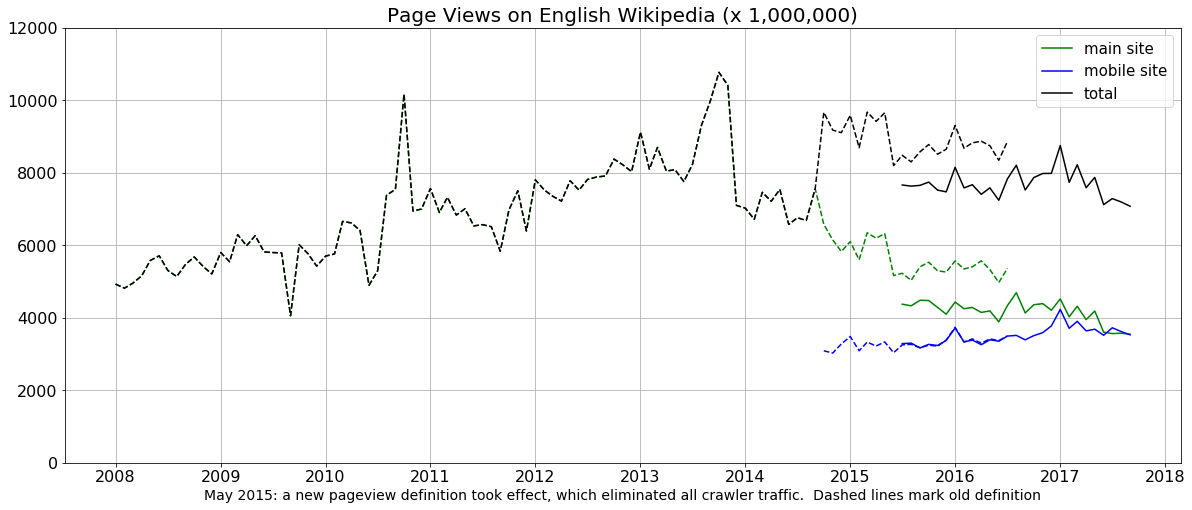

In [37]:
plt.figure(figsize=(20, 8));

plt.plot(dt[90:117], merged_csv['pageview_desktop_views'][90:117]/1e6,'g', label="main site");
plt.plot(dt[90:117], merged_csv['pageview_mobile_views'][90:117]/1e6,'b', label="mobile site");
plt.plot(dt[90:117], merged_csv['pageview_all_views'][90:117]/1e6,'k', label="total",);

plt.legend(['main site', 'mobile site', 'total'], fontsize = 15);

plt.plot(dt[0:103], merged_csv['pagecount_desktop_views'][0:103]/1e6,'g--', label="main site");
plt.plot(dt[81:103], merged_csv['pagecount_mobile_views'][81:103]/1e6,'b--', label="mobile site");
plt.plot(dt[0:103], merged_csv['pagecount_all_views'][0:103]/1e6,'k--', label="total");

plt.title("Page Views on English Wikipedia (x 1,000,000)", fontsize = 20);
plt.ylim((0,12000))
plt.yticks(fontsize = 16);
plt.xticks(fontsize = 16);
plt.grid(True)
plt.xlabel("May 2015: a new pageview definition took effect, which eliminated all crawler traffic.  Dashed lines mark old definition", fontsize = 14);
plt.savefig('./images/pageviews_english_wikipedia.png')

The step below will save the csv locally.

In [35]:
#Last three rows ignored in merged_csv dataframe since they were beyond data range of API calls
merged_csv[0:117].to_csv('./final_data/en-wikipedia_traffic_200801-201709.csv', index=False)